In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import pandas as pd
import pylab as pl
import numpy as np

In [2]:
n_grid = 64
data = pd.read_csv(f'./data/tweb_cw_grid{n_grid}_rcellsize.csv').drop(['Unnamed: 0'], axis=1)
target = pd.read_csv('./data/stellar_phot.csv').drop(['Unnamed: 0'], axis=1)

df = pd.merge(data,target, on='ID')
df

,ID,lambda1,lambda2,lambda3,delta,Environment,Mu,Mg,Mr,Mi,Mz,GALAXY_CLASS
0,16.0,13139.160242,18516.842377,24937.452667,212.680636,0.0,-17.908087,-19.562035,-20.320356,-20.702591,-21.029406,1.0
1,23.0,5275.525017,16495.361777,20279.291479,104.675465,0.0,-18.359802,-20.107349,-20.888083,-21.279430,-21.618624,1.0
2,33.0,13139.160242,18516.842377,24937.452667,212.680636,0.0,-18.453346,-20.105627,-20.840034,-21.210075,-21.523411,1.0
3,34.0,8999.490272,12721.573012,18044.489636,69.916251,0.0,-18.690727,-19.624805,-20.013533,-20.268049,-20.510611,0.0
4,36.0,-2624.268315,9923.010423,14778.152314,31.149943,1.0,-18.850306,-19.972075,-20.425173,-20.698471,-20.948126,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8834,627848.0,-1595.894288,2671.188666,5935.595818,15.401130,1.0,-16.818243,-18.391932,-19.102192,-19.469898,-19.776335,1.0
8835,630142.0,2783.369024,4166.851226,6297.926979,38.698190,0.0,-17.007278,-18.627331,-19.358295,-19.734182,-20.049162,1.0
8836,631897.0,-142.740734,2207.769102,3943.673668,13.537366,1.0,-17.212696,-18.575975,-19.170778,-19.492334,-19.763798,0.0
8837,640342.0,5069.340663,7819.946812,10452.430841,44.569050,0.0,-16.983833,-18.609432,-19.334690,-19.701168,-20.003542,1.0


In [3]:
df = df.dropna()
df

,ID,lambda1,lambda2,lambda3,delta,Environment,Mu,Mg,Mr,Mi,Mz,GALAXY_CLASS
0,16.0,13139.160242,18516.842377,24937.452667,212.680636,0.0,-17.908087,-19.562035,-20.320356,-20.702591,-21.029406,1.0
1,23.0,5275.525017,16495.361777,20279.291479,104.675465,0.0,-18.359802,-20.107349,-20.888083,-21.279430,-21.618624,1.0
2,33.0,13139.160242,18516.842377,24937.452667,212.680636,0.0,-18.453346,-20.105627,-20.840034,-21.210075,-21.523411,1.0
3,34.0,8999.490272,12721.573012,18044.489636,69.916251,0.0,-18.690727,-19.624805,-20.013533,-20.268049,-20.510611,0.0
4,36.0,-2624.268315,9923.010423,14778.152314,31.149943,1.0,-18.850306,-19.972075,-20.425173,-20.698471,-20.948126,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8834,627848.0,-1595.894288,2671.188666,5935.595818,15.401130,1.0,-16.818243,-18.391932,-19.102192,-19.469898,-19.776335,1.0
8835,630142.0,2783.369024,4166.851226,6297.926979,38.698190,0.0,-17.007278,-18.627331,-19.358295,-19.734182,-20.049162,1.0
8836,631897.0,-142.740734,2207.769102,3943.673668,13.537366,1.0,-17.212696,-18.575975,-19.170778,-19.492334,-19.763798,0.0
8837,640342.0,5069.340663,7819.946812,10452.430841,44.569050,0.0,-16.983833,-18.609432,-19.334690,-19.701168,-20.003542,1.0


In [4]:
df.keys()

Index(['ID', 'lambda1', 'lambda2', 'lambda3', 'delta', 'Environment', 'Mu',
       'Mg', 'Mr', 'Mi', 'Mz', 'GALAXY_CLASS'],
      dtype='object')

In [ ]:
pl.scatter( df['Mg']-df['Mr'], 1+df['delta'] )
pl.show()

In [5]:
predictors = ['delta','lambda1','lambda2','lambda3']
Y = df['GALAXY_CLASS']
X = df[predictors]

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

6187 2652


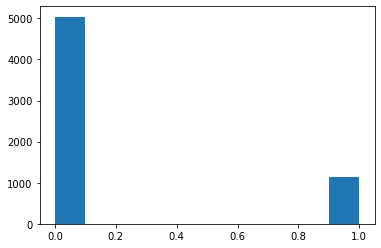

In [7]:
_ = pl.hist(Y_train)
print(len(Y_train), len(Y_test))

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(2,2))
mlp.fit(X_train, Y_train)
Y_pred = mlp.predict(X_test)
print( f' f1_score:{f1_score(Y_test,Y_pred)},  Acc:{accuracy_score(Y_test,Y_pred)}')

 f1_score:0.0,  Acc:0.8092006033182504


In [9]:
dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(X_train, Y_train)
Y_pred = dtc.predict(X_test)
print( f' f1_score:{f1_score(Y_test,Y_pred)},  Acc:{accuracy_score(Y_test,Y_pred)}')

 f1_score:0.4350961538461538,  Acc:0.8227752639517345


In [10]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
print( f' f1_score:{f1_score(Y_test,Y_pred)},  Acc:{accuracy_score(Y_test,Y_pred)}')

 f1_score:0.43896103896103894,  Acc:0.8371040723981901


In [11]:
svc = svm.SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
print( f' f1_score:{f1_score(Y_test,Y_pred)},  Acc:{accuracy_score(Y_test,Y_pred)}')

 f1_score:0.4197860962566845,  Acc:0.8363499245852187


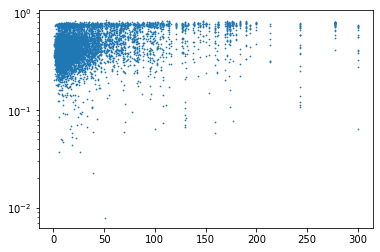

In [16]:
pl.scatter(1+df['delta'], df['Mg']-df['Mr'] , marker='.', s=2)
pl.yscale('log')

In [13]:
min_delta = min(df['delta'])
min_delta

-0.5340587971134894